In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture

from sys import stderr

In [2]:
def read_maxima_data(file: str):
    try:
        maxima = list()
        with open(file, "r") as f:
            lines = f.readlines()

            while len(lines) > 0:
                maximum = dict()
                line = lines.pop(0)
                assert line.startswith("Maximum")

                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("theta=")
                line = line.replace("theta=", "")
                line = line.replace("[", "").replace("]", "")
                maximum["theta"] = np.array(list(map(float, line.split(",")[:-1])))


                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("func_value=")
                line = line.replace("func_value=", "")
                maximum["func_value"] = float(line)

                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("grad=")
                line = line.replace("grad=", "")
                line = line.replace("[", "").replace("]", "")
                maximum["grad"] = np.array(list(map(float, line.split(",")[:-1])))


                line = lines.pop(0)
                assert len(line) == 1

                maxima.append(maximum)
        return maxima
    except IOError as e:
        print(f"{e}", file=stderr)
        return []

In [3]:
maxima = read_maxima_data("../harth_maxima.txt")

In [4]:
DIM = 6
N_CLUSTER = 12

M = list()

for i, m in enumerate(maxima):
    assert len(m['theta']) / DIM == N_CLUSTER

    M.extend(m['theta'].reshape((N_CLUSTER, DIM)))

M = np.array(M)
M.shape

(12000, 6)

In [5]:
M_2d = PCA(n_components=2).fit_transform(M)
M_2d.shape

(12000, 2)

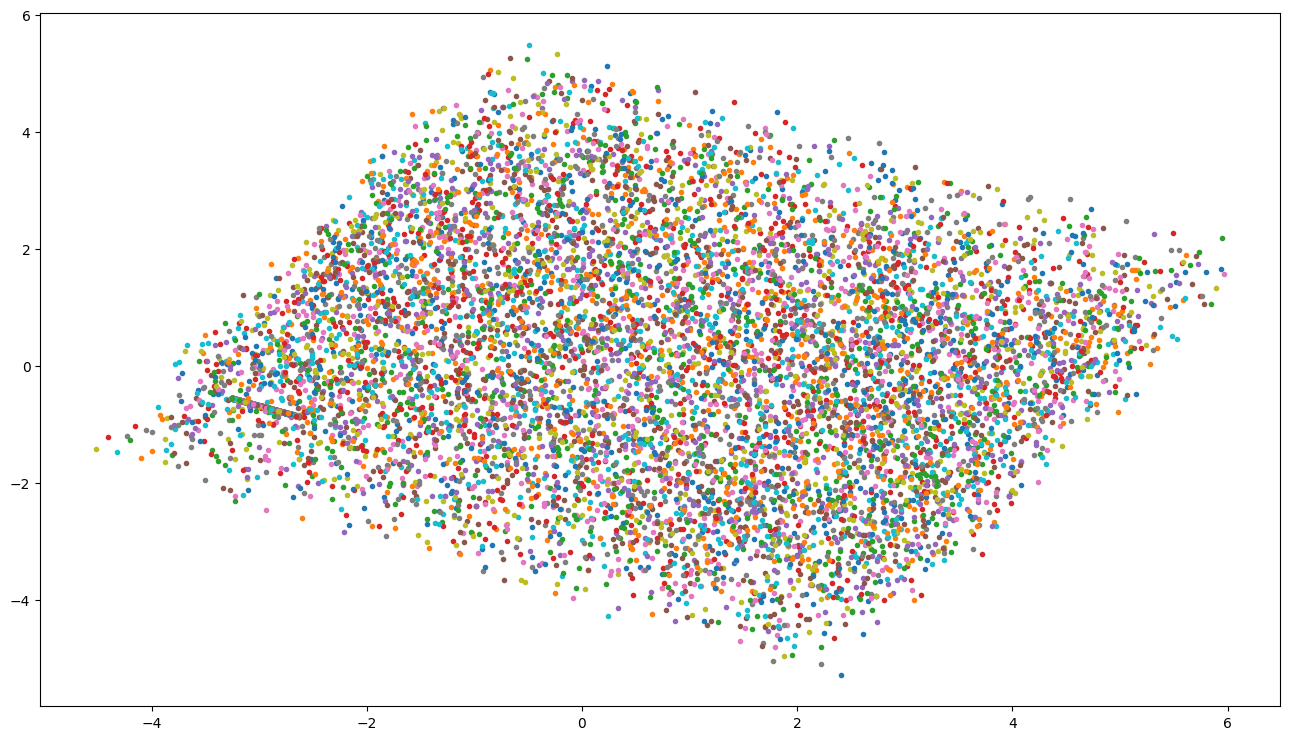

In [6]:
plt.figure(figsize=(16, 9))

for i in range(int(M_2d.shape[0] / N_CLUSTER)):
    M_plot = M_2d[i*N_CLUSTER:(i+1)*N_CLUSTER, :]
    plt.scatter(M_plot[:, 0], M_plot[:, 1], marker=".")

plt.show()

# Compare to KMeans

In [7]:
X = pd.read_csv("../../benchmarks/data/harth_dataset_1000.csv").to_numpy()
X.shape

(1000, 6)

In [8]:
kmeans = KMeans(n_clusters=N_CLUSTER, n_init='auto').fit(X)
kmeans.cluster_centers_.shape

(12, 6)

In [9]:
kmeans_center = kmeans.cluster_centers_
kmeans_center

array([[-1.05553887, -0.04622942,  0.0651241 , -1.39100168,  0.15324279,
         0.61445628],
       [ 0.21724661,  0.83264331, -0.16519821, -0.21051588, -0.93529985,
         0.11678588],
       [-0.97589114,  0.00552593, -0.02211198, -0.28653023,  0.03927638,
         0.92242542],
       [-0.90073405, -0.09122687, -0.44237354, -1.12026338, -0.19375601,
        -0.73306528],
       [-0.45663048,  0.04083665,  0.55296195,  0.0405129 , -0.14102375,
        -1.08652799],
       [-0.23501173,  0.00595562, -0.89960457,  0.12396996,  0.0190084 ,
         0.9368785 ],
       [-1.89654108, -0.05793394, -0.18615894, -2.32360297, -0.28226791,
        -0.32015999],
       [-0.86230816,  0.01485744, -0.48574909, -0.19286385,  0.09797908,
         0.93698741],
       [-0.6119874 ,  0.01933668, -0.14543707, -0.28752335,  0.07765219,
        -0.1199219 ],
       [-0.98182097, -0.01527809, -0.01881291, -0.97638864,  0.03317853,
        -0.13089134],
       [-3.629944  , -0.22167975, -0.5059815 , -1.

In [10]:
M_ext = np.concatenate([M, kmeans_center], axis=0)
M_ext.shape

(12012, 6)

In [11]:
M_ext_2d = PCA(n_components=2).fit_transform(M_ext)
M_ext_2d.shape

(12012, 2)

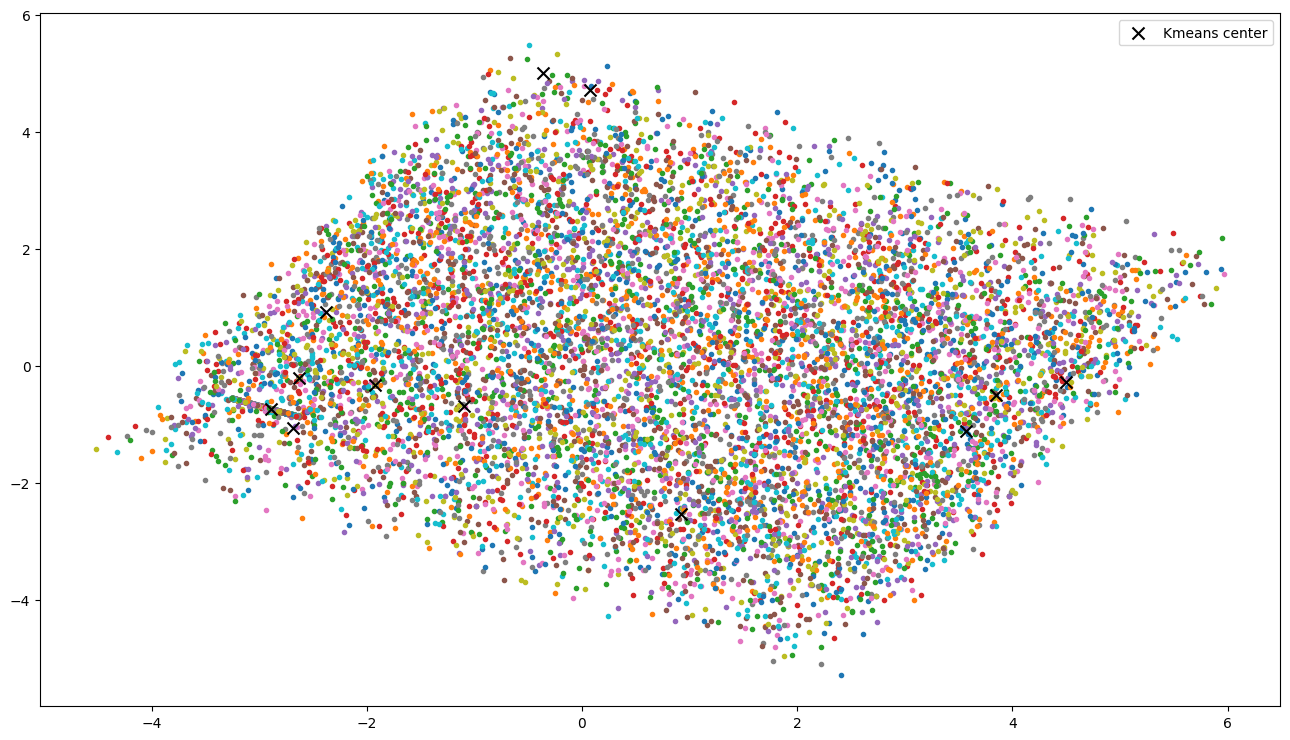

In [12]:
plt.figure(figsize=(16, 9))

for i in range(int(M_2d.shape[0] / N_CLUSTER) - 1):
    M_plot = M_2d[i*N_CLUSTER:(i+1)*N_CLUSTER, :]
    plt.scatter(M_plot[:, 0], M_plot[:, 1], marker=".")

plt.scatter(M_2d[-N_CLUSTER:, 0], M_2d[-N_CLUSTER:, 1], color="black", marker="x", s=75, label="Kmeans center")

plt.legend()

plt.show()

# Compare to Bayesian Gaussian Mixture

In [13]:
bgm = BayesianGaussianMixture(n_components=N_CLUSTER, covariance_type='spherical', covariance_prior=1.0).fit(X)
bgm.means_.shape

(12, 6)

In [14]:
print(f"covariances = {bgm.covariances_}")
print(f"weights = {bgm.weights_}")

covariances = [0.1033529  0.02017995 0.30057525 0.09692189 0.07536926 0.16666057
 0.34480355 0.02946814 0.63476428 0.08273965 0.61700474 0.02329225]
weights = [0.10655386 0.34328282 0.05280184 0.02944327 0.01684609 0.00099063
 0.05976696 0.10147234 0.0039275  0.07592542 0.00385717 0.2051321 ]


In [15]:
bgm_cluster = bgm.means_
bgm_cluster.shape

(12, 6)

In [16]:
M_ext = np.concatenate([M, kmeans_center], axis=0)
M_ext.shape

(12012, 6)

In [17]:
M_ext_2d = PCA(n_components=2).fit_transform(M_ext)
M_ext_2d.shape

(12012, 2)

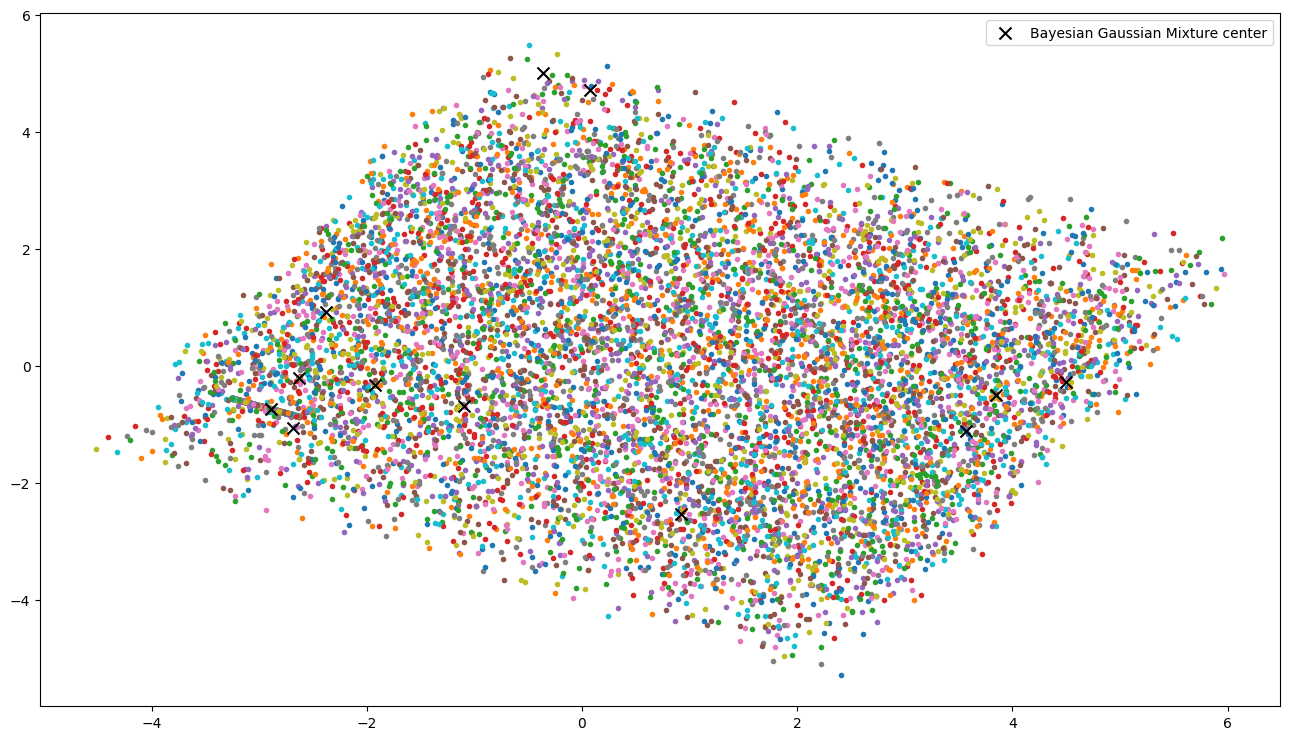

In [18]:
plt.figure(figsize=(16, 9))

for i in range(int(M_2d.shape[0] / N_CLUSTER) - 1):
    M_plot = M_2d[i*N_CLUSTER:(i+1)*N_CLUSTER, :]
    plt.scatter(M_plot[:, 0], M_plot[:, 1], marker=".")

plt.scatter(M_2d[-N_CLUSTER:, 0], M_2d[-N_CLUSTER:, 1], color="black", marker="x", s=75, label="Bayesian Gaussian Mixture center")

plt.legend()

plt.show()